# Analyse et prédiction des infections COVID-19
## Auteur : Tiziri OULD HADDA

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import math
import seaborn as sns

# 1. Chargement et pré-traitement des données

In [2]:
#df = pd.read_csv('latestdata.csv')
df = pd.read_csv('clean-hubei.csv')

## 1.1 Reformattage des données et valeurs manquantes
On remarquera ci dessus que les données sont pleine de valeurs manquante et de valeurs mal enregistré.
On veut dire par ce dernier : des fautes d'orthographes, age renseigné sous différents format (min-max, min+, max-...), plusieurs valeurs qui veulent dire la même chose ...etc.

On utilisera pour cela une transformation appropriée pour chaque type de données.

Exemple de ces valeurs :

In [3]:
print('--------- Outcome -------------')
print(df['outcome'].unique())

--------- Outcome -------------
[nan 'discharged' 'died']


In [4]:
print('--------- Age -------------')
print(df['age'].unique())

--------- Age -------------
['15-88' '32' '49' '66' '48' '89' '61' '69' '75' '82' '81' '65' '80' '53'
 '86' '70' '84' nan '21-39' '40-49' '50-59' '60-69' '70-82' '25-89' '76'
 '72' '79' '55' '87' '58' '78' '67' '85' '36' '73']


In [5]:
dates_columns = ['date_onset_symptoms', 'date_admission_hospital', 'date_confirmation', 'date_death_or_discharge']
for col in dates_columns:
    print('--------- ',col,' -------------')
    print(df[col].unique()) 

---------  date_onset_symptoms  -------------
['- 18.01.2020' nan '23.12.2019' '10.12.2019' '10.01.2020' '13.01.2020'
 '20.12.2019' '30.12.2019' '05.01.2020' '06.01.2020' '09.01.2020'
 '22.12.2019' '15.01.2020' '03.01.2020' '11.01.2020'
 '01.01.2020 - 31.01.2020' '02.01.2020' '18.01.2020' '08.01.2020'
 '12.01.2020' '26.11.2020' '29.12.2019']
---------  date_admission_hospital  -------------
[nan '27.12.2019' '31.12.2019' '16.01.2020' '10.12.2019' '18.01.2020'
 '03.01.2020' '05.01.2020' '11.01.2020' '14.01.2020' '06.01.2020'
 '13.01.2020' '09.01.2020' '19.01.2020' '17.01.2020' '23.01.2020'
 '15.01.2020' '01.01.2020' '12.01.2020' '21.01.2020']
---------  date_confirmation  -------------
['20.01.2020' nan '18.01.2020' '19.01.2020' '23.01.2020' '27.01.2020'
 '28.01.2020' '29.01.2020' '30.01.2020' '31.01.2020' '01.02.2020'
 '03.02.2020']
---------  date_death_or_discharge  -------------
[nan '16.01.2020' '20.01.2020' '19.01.2020' '09.01.2020' '15.01.2020'
 '18.01.2020' '21.01.2020' '22.01.2

### Traitement  de la variable  'outcome':
On va changer la colonne 'outcome' (ou résultat) par une nouvelle colonne qui decrit si le patient et vivant ou mort du covid19.

Ne sera pas utilisée exactement comme tel dans ce cas car j'avais commencé à travaillé sur 'latestdata.csv'

In [6]:
dead = df['outcome'].apply(lambda x: x in ['death','died', 'Death', 'dead', 'Dead', 'Died', 'Deceased'])
df['dead'] = dead
print('dead variable values:\n', df['dead'].unique())

dead variable values:
 [False  True]


### Traitement de la variable 'age':
On va utiliser dans ce cas, la fonction suivante qui traduira en flottant l'age selon le format utilisé:

**Si le format utilisée est :**
* 'min-max'     => ( float(max) + float(min) )  / 2
* 'X mounth(s)' =>   float(X)  / 12
* 'X week(s)' =>   float(X)  / 12 / 4
* 'X+' =>   float(X)
* 'X-' =>   float(X)
* 'X' =>   float(X)

In [7]:
def age_string_to_value(age):
    if '-' in age:
        a, b = age.split('-')
        if b != '': #X-
            return (float(a)+float(b))/2
        else:       #min-max
            return float(a)
    elif 'month' in age:
        a, b = age.split('month')
        return float(a)/12
    elif '+' in age:
        a, b = age.split('+')
        return float(a)
    elif 'week' in age:
        a, b = age.split('week')
        return float(a)/12/4
    else:
        return float(age)
df['age'] = df['age'].apply(lambda x: age_string_to_value(str(x)))

np.sort(df.age.unique())

array([30. , 32. , 36. , 44.5, 48. , 49. , 51.5, 53. , 54.5, 55. , 57. ,
       58. , 61. , 64.5, 65. , 66. , 67. , 69. , 70. , 72. , 73. , 75. ,
       76. , 78. , 79. , 80. , 81. , 82. , 84. , 85. , 86. , 87. , 89. ,
        nan])

###  Traitement des variables de type "date"

In [8]:
from datetime import datetime

import dateutil.parser

def string_to_timestamp(datetime_str):
    if datetime_str == 'nan':
        #return datetime.strptime(' 01.01.2020', ' %d.%m.%Y').timestamp()
        return datetime_str
    elif '-' in datetime_str:
        a,b = datetime_str.split('-')
        if a == '':
            return dateutil.parser.parse(b).timestamp()
        if b == '':
            return dateutil.parser.parse(a).timestamp()

        return (dateutil.parser.parse(a).timestamp() + dateutil.parser.parse(b).timestamp())//2
    else:
        #return datetime.strptime(datetime_str, '%d.%m.%Y').timestamp()
        return dateutil.parser.parse(datetime_str).timestamp()

#for col in dates_columns:
    #df[col+'_reformated'] = df[col].apply(lambda x: string_to_timestamp(str(x))).astype(float)
    #print(col+'_reformated : ', np.sort(df[col+'_reformated']))



###  Traitement des variables de type "string" ou "catégorique"

In [9]:
city_infos = df['city'].apply(lambda x: math.nan if type(x) == float else x.lower() )
df['city'] = city_infos
print(df['city'].unique())

['wuhan city' 'xiaogan city' 'huanggang city' 'jingzhou city'
 'jingmen city' 'xiantao city' "yuan'an county, yichang city"
 'shiyan city' 'enshi prefecture' 'suizhou city' 'tianmen city'
 'ezhou city' 'xiangyang city' 'yichang city' 'xianning city'
 'huangshi city' 'qianjiang city' 'shennongjia forest district']


##  1.2. Transformation des données
### liste de symptome

In [10]:
df['symptoms'].unique()

array([nan, 'chest discomfort, cough, fever',
       'dyspnea, respiratory stress', 'cough, fatigue, fever, headache',
       'cough, fatigure, fever, little sputum, muscular soreness',
       'dyspnea', 'cough, fever', 'obnubilation, somnolence',
       'cough, expectoration, emesis, fever',
       'cold chills, muscular soreness', 'dry cough', 'fever',
       'chest distress, cough, fatigue, fever',
       'fatigue, shortness of breath', 'cough, fever, grasp, dyspnea',
       'chest distress, cough, fever', 'fatigue', 'cough, fever, grasp',
       'cough, fever, gasp', 'diarrhea, fever', 'chest distress, fever',
       'chest distress, cough, fever, gasp',
       'cough, fever, sensation of chill', 'dizziness, fever',
       'cough, expectoration, fever',
       'chest distress, chest pain, fever, weak, dyspnea',
       'cough, fever, muscular soreness', 'fatigue, fever',
       'cough, fever, dyspnea', 'primary myelofibrosis'], dtype=object)

In [11]:
def map_symptoms_by_item(s):
    ss = s.split(' ')
    if len(ss[0]) == 0:
        s = s.replace(' ', '', 1)
    return s

def map_symptoms_by_observ(x):
    if type(x) == float and math.isnan(x):
        return set()
    if x == "":
        return set()    
    return set(map(lambda s: map_symptoms_by_item(s),x.lower().split(',')))

symptoms_sets = df['symptoms'].apply(map_symptoms_by_observ)

symptoms_columns = set()

for item in symptoms_sets:
    symptoms_columns = symptoms_columns.union(set(item))

print(symptoms_columns)

for item in symptoms_columns:
    df[item+' symptom'] = symptoms_sets.apply(lambda sl: item in sl)

{'headache', 'sensation of chill', 'obnubilation', 'dizziness', 'cough', 'expectoration', 'grasp', 'emesis', 'fatigue', 'shortness of breath', 'dyspnea', 'respiratory stress', 'muscular soreness', 'cold chills', 'dry cough', 'somnolence', 'little sputum', 'chest pain', 'fatigure', 'weak', 'fever', 'diarrhea', 'primary myelofibrosis', 'chest distress', 'gasp', 'chest discomfort'}


### Information complémentataire et suppression des dupliqués

In [12]:
def prepare_add_infos(s):
    if type(s) == float and math.isnan(s):
        return "" 
    ss = s.split(':')
    #print(ss)
    if len(ss) > 1:
        return ss[1]
    return ss[0]
    
additional_information_sets = df['additional_information'].apply(lambda s: map_symptoms_by_observ(prepare_add_infos(s)))
add_infos_columns = set()
for item in additional_information_sets:
    add_infos_columns = symptoms_columns.union(set(item))

print(add_infos_columns)

for item in add_infos_columns:
    if item not in symptoms_columns:
        df[item] = additional_information_sets.apply(lambda sl: item in sl)

{'headache', 'sensation of chill', 'obnubilation', 'dizziness', 'cough', 'expectoration', 'grasp', 'emesis', 'fatigue', 'shortness of breath', 'dyspnea', 'respiratory stress', 'muscular soreness', 'cold chills', 'dry cough', 'somnolence', 'little sputum', 'chest pain', 'fatigure', 'weak', 'fever', 'diarrhea', 'primary myelofibrosis', 'chest distress', 'gasp', 'chest discomfort'}


### Informations binaires

In [13]:
df['lives_in_wuhan'] = df['lives_in_wuhan'].apply(lambda r: math.nan if type(r)==float else r == 'yes')
df['chronic_disease_binary'] = df['chronic_disease_binary'].apply(lambda r: math.nan if r==math.nan else r == 1)

In [14]:
print('lives_in_wuhan variable valeus: ',df.lives_in_wuhan.unique())
print('chronic_disease_binary variable valeus: ',df.chronic_disease_binary.unique())

lives_in_wuhan variable valeus:  [nan True False]
chronic_disease_binary variable valeus:  [False  True]


## 1.3. Identification et suppression des colonnes innutiles et Traitement des valeurs manquantes

In [15]:
categoricals  = []
quantitatives = []
rejected_columns  = dates_columns + ['id', 'outcome', 'city', 'reported_market_exposure' , 'chronic_disease', 'admin_id','admin2','admin3', 'latitude', 'longitude', 'source', 'symptoms', 'symptoms_reformatted', 'additional_information', 'additional_information_reformatted']
#print(rejected_columns)

for col in df.columns:
    #print(col)
    if len(df[col].unique()) <= 1 or len(df[col].unique()) == len(df) or col in rejected_columns:
        df = df.drop(columns=[col])
    elif df[col].dtype not in [object, bool]:
        #print(col)
        print("%32s" % col, ' : ', df[col].dtype,', mean: ', df[col].mean())
        df[col] = df[col].replace(np.nan, df[col].mean())
        quantitatives.append(col)
        #print(df[col].unique())
    else:
        #print(col)
        print("%32s" % col, ' : ', df[col].dtype,', mode: ', df[col].mode()[0])
        df[col] = df[col].replace(np.nan, df[col].mode()[0])
        if df[col].dtype == object:
            categoricals.append(col)
        else:
            quantitatives.append(col)
        #print(df[col].unique())
        
print('-----------------------------------------------')        
print('variables catégoriques  :\n', categoricals)
print('-----------------------------------------------')
print('variables quantitatives :\n', quantitatives)
print('-----------------------------------------------')

                             age  :  float64 , mean:  57.11063829787234
                             sex  :  object , mode:  male
                  lives_in_wuhan  :  object , mode:  True
          chronic_disease_binary  :  bool , mode:  False
              sequence_available  :  object , mode:  yes
                            dead  :  bool , mode:  False
                headache symptom  :  bool , mode:  False
      sensation of chill symptom  :  bool , mode:  False
            obnubilation symptom  :  bool , mode:  False
               dizziness symptom  :  bool , mode:  False
                   cough symptom  :  bool , mode:  False
           expectoration symptom  :  bool , mode:  False
                   grasp symptom  :  bool , mode:  False
                  emesis symptom  :  bool , mode:  False
                 fatigue symptom  :  bool , mode:  False
     shortness of breath symptom  :  bool , mode:  False
                 dyspnea symptom  :  bool , mode:  False
      respirat

In [16]:
np.sort(df.columns)

array(['age', 'chest discomfort symptom', 'chest distress symptom',
       'chest pain symptom', 'chronic_disease_binary',
       'cold chills symptom', 'cough symptom', 'dead', 'diarrhea symptom',
       'dizziness symptom', 'dry cough symptom', 'dyspnea symptom',
       'emesis symptom', 'expectoration symptom', 'fatigue symptom',
       'fatigure symptom', 'fever symptom', 'gasp symptom',
       'grasp symptom', 'headache symptom', 'little sputum symptom',
       'lives_in_wuhan', 'muscular soreness symptom',
       'obnubilation symptom', 'primary myelofibrosis symptom',
       'respiratory stress symptom', 'sensation of chill symptom',
       'sequence_available', 'sex', 'shortness of breath symptom',
       'somnolence symptom', 'weak symptom'], dtype=object)

# 2. Analyse de données

## 2.1 Etude d'indépendance:

In [17]:
pd.options.display.float_format = None
determ_coef = (df.corr() ** 2)
determ_coef

,age,lives_in_wuhan,chronic_disease_binary,dead,headache symptom,sensation of chill symptom,obnubilation symptom,dizziness symptom,cough symptom,expectoration symptom,...,little sputum symptom,chest pain symptom,fatigure symptom,weak symptom,fever symptom,diarrhea symptom,primary myelofibrosis symptom,chest distress symptom,gasp symptom,chest discomfort symptom
age,1.000000,1.884702e-03,2.060809e-01,2.200180e-01,2.392765e-03,1.884702e-03,3.079290e-02,2.961389e-03,6.486216e-02,5.339541e-03,...,2.513371e-03,1.875800e-02,2.513371e-03,1.875800e-02,1.280767e-01,2.705156e-02,1.884702e-03,1.862574e-02,7.856526e-03,1.991907e-03
lives_in_wuhan,0.001885,1.000000e+00,2.048875e-07,2.490379e-02,9.737292e-09,9.737292e-09,9.737292e-09,9.737292e-09,1.951117e-07,1.947651e-08,...,9.737292e-09,9.737292e-09,9.737292e-09,9.737292e-09,3.027523e-07,9.737292e-09,1.000000e+00,4.870569e-08,1.947651e-08,9.737292e-09
chronic_disease_binary,0.206081,2.048875e-07,1.000000e+00,5.240137e-01,4.752507e-02,4.752507e-02,4.752507e-02,4.752507e-02,2.870888e-01,2.366629e-02,...,4.752507e-02,4.752507e-02,4.752507e-02,4.752507e-02,4.966954e-01,4.752507e-02,2.048875e-07,1.519824e-01,9.505952e-02,2.048875e-07
dead,0.220018,2.490379e-02,5.240137e-01,1.000000e+00,2.490379e-02,2.490379e-02,2.490379e-02,2.490379e-02,4.501699e-01,4.981249e-02,...,2.490379e-02,2.490379e-02,2.490379e-02,2.490379e-02,7.249684e-01,2.490379e-02,2.490379e-02,1.245681e-01,4.981249e-02,3.909964e-07
headache symptom,0.002393,9.737292e-09,4.752507e-02,2.490379e-02,1.000000e+00,9.737292e-09,9.737292e-09,9.737292e-09,4.990626e-02,1.947651e-08,...,9.737292e-09,9.737292e-09,9.737292e-09,9.737292e-09,3.216257e-02,9.737292e-09,9.737292e-09,4.870569e-08,1.947651e-08,9.737292e-09
sensation of chill symptom,0.001885,9.737292e-09,4.752507e-02,2.490379e-02,9.737292e-09,1.000000e+00,9.737292e-09,9.737292e-09,4.990626e-02,1.947651e-08,...,9.737292e-09,9.737292e-09,9.737292e-09,9.737292e-09,3.216257e-02,9.737292e-09,9.737292e-09,4.870569e-08,1.947651e-08,9.737292e-09
obnubilation symptom,0.030793,9.737292e-09,4.752507e-02,2.490379e-02,9.737292e-09,9.737292e-09,1.000000e+00,9.737292e-09,1.951117e-07,1.947651e-08,...,9.737292e-09,9.737292e-09,9.737292e-09,9.737292e-09,3.027523e-07,9.737292e-09,9.737292e-09,4.870569e-08,1.947651e-08,9.737292e-09
dizziness symptom,0.002961,9.737292e-09,4.752507e-02,2.490379e-02,9.737292e-09,9.737292e-09,9.737292e-09,1.000000e+00,1.951117e-07,1.947651e-08,...,9.737292e-09,9.737292e-09,9.737292e-09,9.737292e-09,3.216257e-02,9.737292e-09,9.737292e-09,4.870569e-08,1.947651e-08,9.737292e-09
cough symptom,0.064862,1.951117e-07,2.870888e-01,4.501699e-01,4.990626e-02,4.990626e-02,1.951117e-07,1.951117e-07,1.000000e+00,9.982236e-02,...,4.990626e-02,1.951117e-07,4.990626e-02,1.951117e-07,6.444597e-01,1.951117e-07,1.951117e-07,8.962997e-02,9.982236e-02,4.990626e-02
expectoration symptom,0.005340,1.947651e-08,2.366629e-02,4.981249e-02,1.947651e-08,1.947651e-08,1.947651e-08,1.947651e-08,9.982236e-02,1.000000e+00,...,1.947651e-08,1.947651e-08,1.947651e-08,1.947651e-08,6.433149e-02,1.947651e-08,1.947651e-08,9.742098e-08,3.895686e-08,1.947651e-08


On remarque que la cause de mortalité avec le Covid19 dépend :
 - fever symptom                   0.7250 -> fièvre
 - chronic_disease_binary          0.5240 -> maladie chronique
 - cough symptom                   0.4502 -> toux
 - age                             0.2200 -> l'age du patient
 - chest distress symptom          0.1246 -> détresse thoracique
 - dyspnea symptom                 0.1246 -> dyspnée : difficulté ou gêne respiratoire
 - fatigue symptom                 0.1246 -> fatigue


In [18]:
pd.options.display.float_format = '{:.4f}'.format
determ_coef['dead'].sort_values(ascending=False)

dead                            1.0000
fever symptom                   0.7250
chronic_disease_binary          0.5240
cough symptom                   0.4502
age                             0.2200
chest distress symptom          0.1246
dyspnea symptom                 0.1246
fatigue symptom                 0.1246
muscular soreness symptom       0.0747
gasp symptom                    0.0498
expectoration symptom           0.0498
grasp symptom                   0.0498
primary myelofibrosis symptom   0.0249
lives_in_wuhan                  0.0249
diarrhea symptom                0.0249
chest pain symptom              0.0249
dizziness symptom               0.0249
weak symptom                    0.0249
sensation of chill symptom      0.0249
respiratory stress symptom      0.0249
headache symptom                0.0249
cold chills symptom             0.0249
dry cough symptom               0.0249
little sputum symptom           0.0249
fatigure symptom                0.0249
emesis symptom           

In [19]:
pd.options.display.float_format = None

### Calcule de p-value:

p-value = 1 : On ne peut pas donc rejeter l'hypothèse d'indépendance

In [20]:
from scipy.stats import chi2_contingency, chisquare
print('death rate:', "%.2f" % ((df['dead'] == True).sum()/df['dead'].count()*100), '%') # la mortalité (tau)
for cat in categoricals:
    df_cat = df[[cat, 'dead']]
    df_cat = df_cat.apply(lambda x : pd.factorize(x)[0]) + 1 # par exemple les couleurs on les representes par les entiers
    print('pvalue (','%32s'% cat,', dead): ', chi2_contingency(df_cat)[1]) # elle retourne plusieurs champs et le champs 1 represente le P_value

death rate: 0.39 %
pvalue (                              sex , dead):  1.0
pvalue (               sequence_available , dead):  1.0


In [21]:
df

,age,sex,lives_in_wuhan,chronic_disease_binary,sequence_available,dead,headache symptom,sensation of chill symptom,obnubilation symptom,dizziness symptom,...,little sputum symptom,chest pain symptom,fatigure symptom,weak symptom,fever symptom,diarrhea symptom,primary myelofibrosis symptom,chest distress symptom,gasp symptom,chest discomfort symptom
0,51.500000,male,True,False,yes,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,51.500000,male,True,False,yes,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,51.500000,male,True,False,yes,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,51.500000,male,True,False,yes,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,51.500000,male,True,False,yes,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10130,57.110638,male,True,False,yes,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10131,57.110638,male,True,False,yes,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10132,57.110638,male,True,False,yes,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10133,57.110638,male,True,False,yes,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
print(df.columns)

Index(['age', 'sex', 'lives_in_wuhan', 'chronic_disease_binary',
       'sequence_available', 'dead', 'headache symptom',
       'sensation of chill symptom', 'obnubilation symptom',
       'dizziness symptom', 'cough symptom', 'expectoration symptom',
       'grasp symptom', 'emesis symptom', 'fatigue symptom',
       'shortness of breath symptom', 'dyspnea symptom',
       'respiratory stress symptom', 'muscular soreness symptom',
       'cold chills symptom', 'dry cough symptom', 'somnolence symptom',
       'little sputum symptom', 'chest pain symptom', 'fatigure symptom',
       'weak symptom', 'fever symptom', 'diarrhea symptom',
       'primary myelofibrosis symptom', 'chest distress symptom',
       'gasp symptom', 'chest discomfort symptom'],
      dtype='object')


## 2.2 Partitionnement des données : Ensembles d'entrainement et ensemble de test

In [23]:
X = pd.get_dummies(data=df, drop_first=True)
#X['age'] = df.age
#X['sex'] = df.sex
print(X.columns)
Y = df['dead']

Index(['age', 'lives_in_wuhan', 'chronic_disease_binary', 'dead',
       'headache symptom', 'sensation of chill symptom',
       'obnubilation symptom', 'dizziness symptom', 'cough symptom',
       'expectoration symptom', 'grasp symptom', 'emesis symptom',
       'fatigue symptom', 'shortness of breath symptom', 'dyspnea symptom',
       'respiratory stress symptom', 'muscular soreness symptom',
       'cold chills symptom', 'dry cough symptom', 'somnolence symptom',
       'little sputum symptom', 'chest pain symptom', 'fatigure symptom',
       'weak symptom', 'fever symptom', 'diarrhea symptom',
       'primary myelofibrosis symptom', 'chest distress symptom',
       'gasp symptom', 'chest discomfort symptom', 'sex_male'],
      dtype='object')


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6081, 31)
(4054, 31)
(6081,)
(4054,)


## 2.3 Visualisation : Décomposition en composantes principales PCA

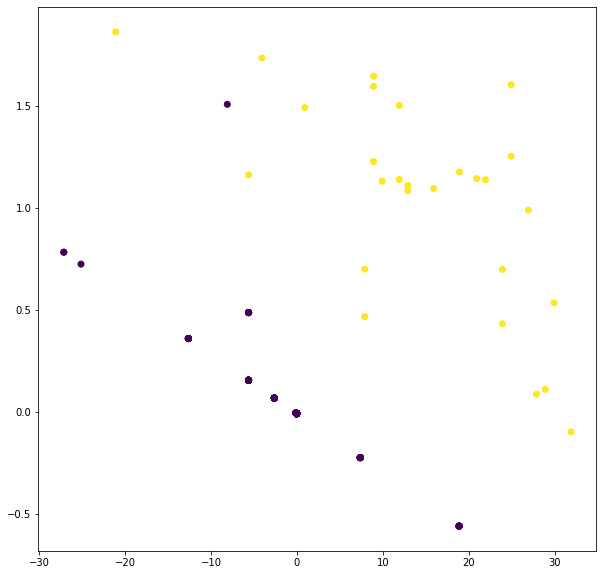

In [25]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X_train)
plt.figure(figsize=(10,10))
plt.scatter(data_pca[:,0], data_pca[:,1], c = y_train)
plt.show()

## 2.4 Regression logistique :
### Etude

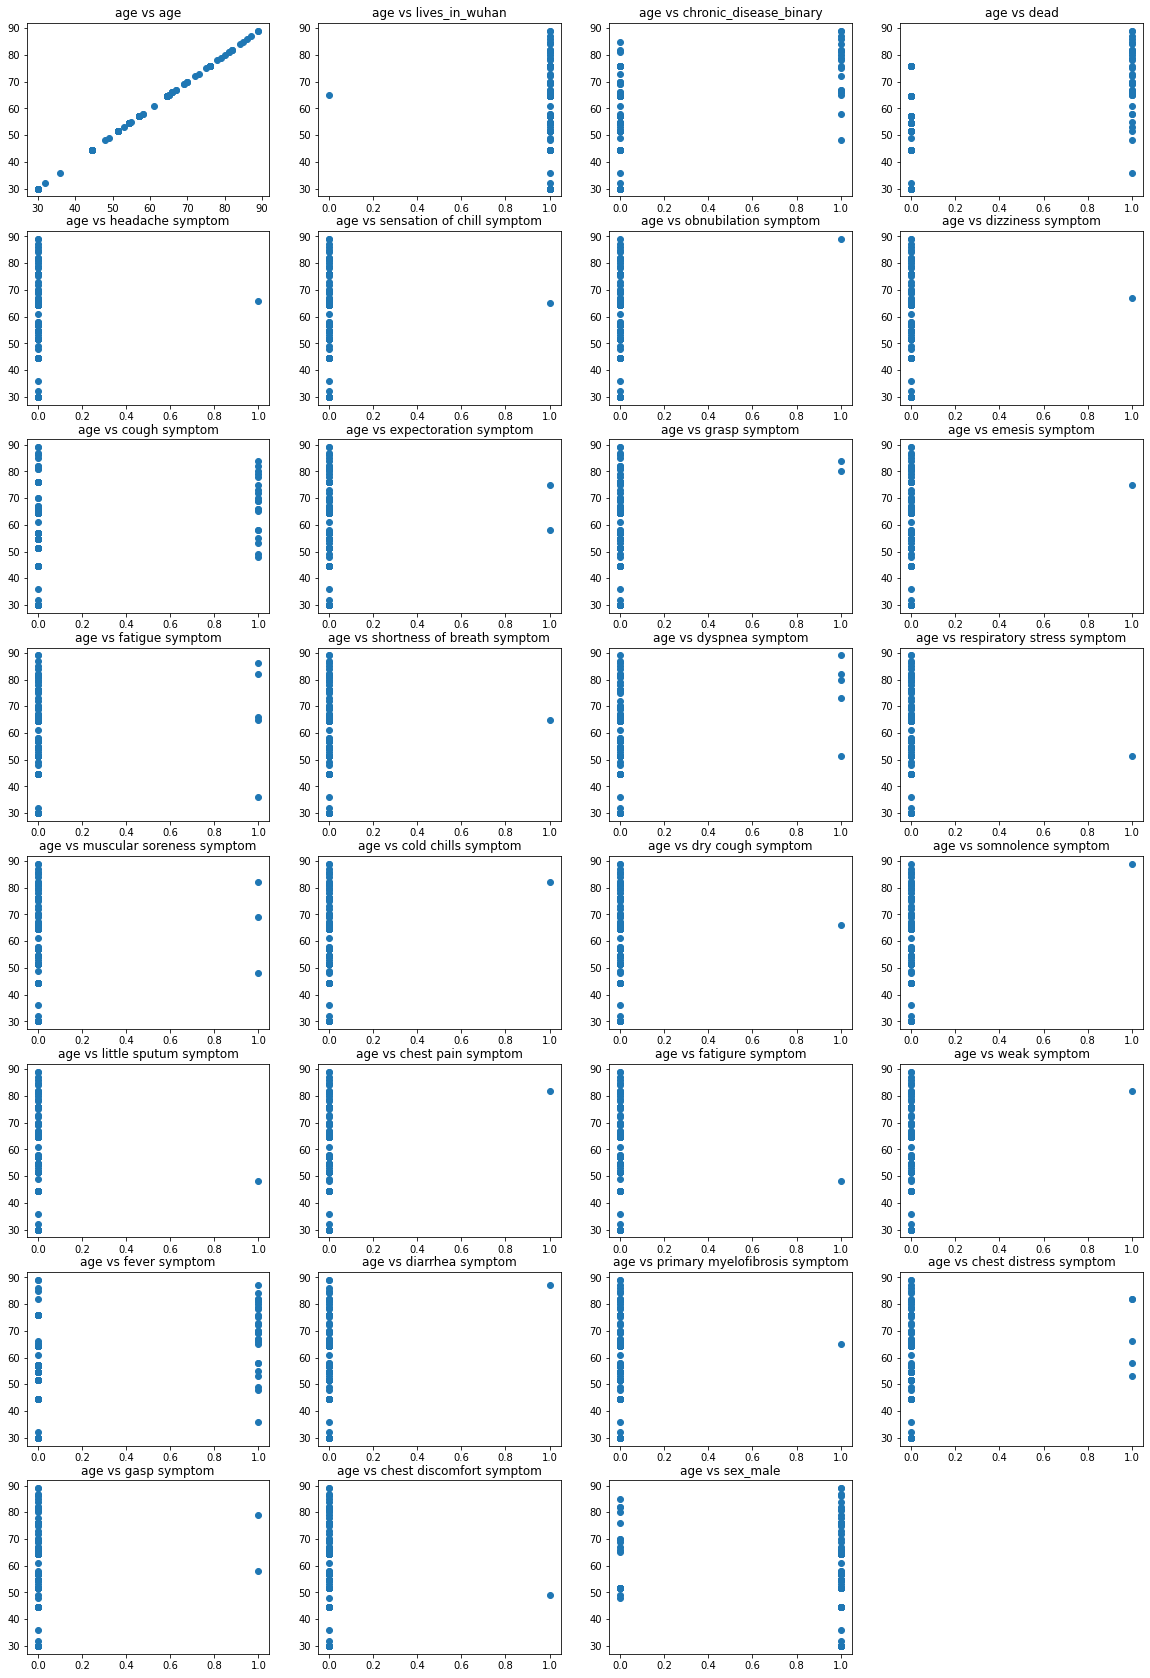

In [26]:
plt.figure(figsize=(20,30))
for i,col in enumerate(X.columns):
    plt.subplot(8,4,i+1)
    plt.scatter(X[col], X.age)
    plt.title('age vs '+ col)
plt.show() 

### Exemple sur Age vs Death

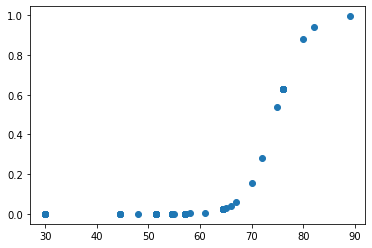

In [27]:
from sklearn.linear_model import LogisticRegression

def lr_input(vect):
    return np.array([vect]).T

clf = LogisticRegression(random_state=0).fit(lr_input(X_train['age']), y_train)
y_pred = clf.predict(lr_input(X_test['age']))
y_pred = clf.predict_proba(lr_input(X_test['age']))

plt.scatter(X_test['age'],y_pred[:,1])

### Exemple sur Age vs chronic disease

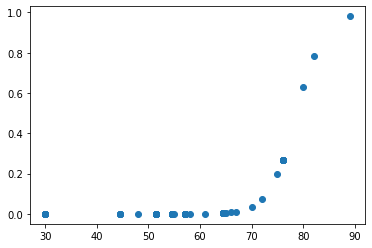

In [37]:
clf = LogisticRegression(random_state=0).fit(lr_input(X_train['age']), X_train['chronic_disease_binary'])
y_pred = clf.predict(lr_input(X_test['age']))
y_pred = clf.predict_proba(lr_input(X_test['age']))

plt.scatter(X_test['age'],y_pred[:,1])

## 2.5 Classification Supervisée

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [29]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9985199802664035
[[4041    0]
 [   6    7]]


In [30]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

1.0
[[4041    0]
 [   0   13]]


## 2.6 Clustering : K-Means, Agglomerative Clustering

In [31]:
from sklearn.cluster import *
from sklearn import metrics
k_min = 2
k_max = 5
#algo_list = [KMeans]
M=X_train
algo_list = [KMeans, AgglomerativeClustering]
k_count = np.zeros(k_max-k_min+1, dtype=int)
for i, algo in enumerate(algo_list):    
    # choix du nombre de clusters (argmax (sum silhouette sur 10 iter par valeur de k))
    k_silh = np.zeros(k_max-k_min+1)
    k_silh += np.array(
            [metrics.silhouette_score(
                M, 
                algo(n_clusters=k).fit(M).labels_) 
             for k in range(k_min,k_max+1)]
        )
    print(k_silh)
    k_count[np.argmax (k_silh)] += 1
print(k_count)
k_optimal = np.argmax (k_count) + k_min
print(k_optimal)

[0.98830417 0.98761349 0.9882744  0.99107144]
[0.98837153 0.98689181 0.98825003 0.99184027]
[0 0 0 2]
5


### Commentaire : 
Le fait que les coefficient sont trop rapproché veux dire que les clusters obtenu sont instables.
il est difficile de determiné un k optimal dans ce cas. Vu qu'on est dans le cas supervisé alors on va forcé cette valeur à 2 pour la suite.

In [32]:
k_optimal = 2

### Visualisation

0.9970399605328071
0.9962177273474757


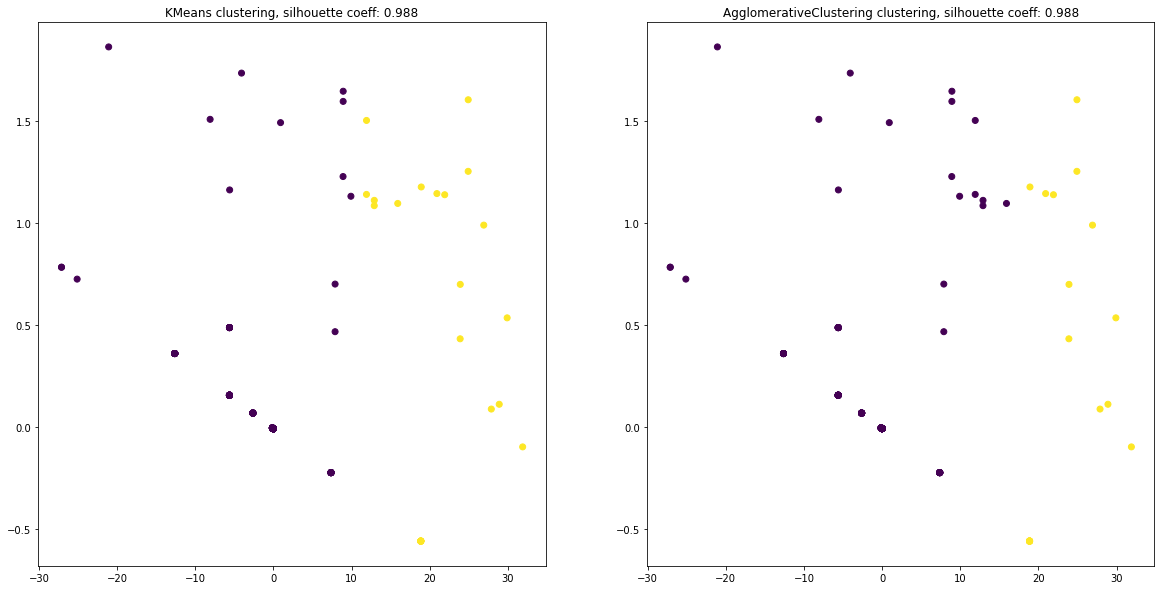

In [33]:
from sklearn.cluster import *
plt.figure(figsize=(20,10))
algo_list = [KMeans, AgglomerativeClustering]
for i, algo in enumerate(algo_list):
    labels = algo(n_clusters=k_optimal).fit(M).labels_
    plt.subplot(1,2,i+1)
    print(accuracy_score(y_train, labels))
    plt.scatter(data_pca[:,0], data_pca[:,1], c=labels)
    plt.title(algo.__name__ + ' clustering, silhouette coeff: ' + "%.3f" % metrics.silhouette_score(M, labels))
plt.show()